# Predicting Operational Efficiency of Manufacturing Teams - EDA & Observations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('manufacturing_data.csv')

In [3]:
df.head(10)

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.60,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.80,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.80,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.70,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.80,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604
5,2/16/2015,Q3,Stitching Unit,Monday,Line-F2,0.80,30.10,461.0,0,0,0.0,0,No Style Change,59.0,0.800980
6,2/26/2015,Q4,Finishing & Quality,Thursday,Line-S1,0.50,3.94,NaN,3360,0,0.0,0,No Style Change,8.0,0.768847
7,2/28/2015,Q4,Finishing & Quality,Saturday,Line-S1,0.50,3.94,NaN,3360,0,0.0,0,No Style Change,8.0,0.768847
8,1/24/2015,Q4,Stitching Unit,Saturday,Line-C1,0.65,22.52,1295.0,10170,26,0.0,0,No Style Change,56.5,0.650417
9,3/5/2015,Q1,Stitching Unit,Thursday,Line-Q1,0.75,18.79,1228.0,6240,45,0.0,0,No Style Change,52.0,0.750396


In [4]:
df.tail(10)

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
1187,3/8/2015,Q2,Stitching Unit,Sunday,Line-C2,0.60,30.48,869.0,6720,0,0.0,0,Minor Style Revision,56.0,0.600529
1188,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-Q1,0.80,3.94,NaN,1440,0,0.0,0,No Style Change,8.0,0.858144
1189,1/19/2015,Q3,Finishing & Quality,Monday,Line-C2,0.80,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.683807
1190,1/27/2015,Q4,Finishing & Quality,Tuesday,Line-C1,0.50,4.15,NaN,960,0,0.0,0,No Style Change,8.0,0.803542
1191,1/7/2015,Q1,Stitching Unit,Wednesday,Line-F2,0.70,21.98,413.0,9720,40,0.0,0,No Style Change,58.0,0.700481
1192,3/3/2015,Q1,Finishing & Quality,Tuesday,Line-F2,0.70,4.60,NaN,3360,0,0.0,0,No Style Change,8.0,0.354444
1193,3/7/2015,Q1,Finishing & Quality,Saturday,Line-F3,0.50,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.797500
1194,3/9/2015,Q2,Finishing & Quality,Monday,Line-F2,0.60,3.94,NaN,0,2880,0.0,0,No Style Change,12.0,0.864343
1195,2/19/2015,Q3,Stitching Unit,Thursday,Line-C1,0.75,30.10,444.0,0,0,5.0,20,Minor Style Revision,59.0,0.611141
1196,3/8/2015,Q2,Finishing & Quality,Sunday,Line-Q2,0.70,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.441042


In [5]:
print(df['productionDept'].value_counts())

productionDept
Stitching Unit           691
 Finishing & Quality     257
Finishing & Quality      249
Name: count, dtype: int64


In [6]:
# There is extra spaces for few values ("Finishing & Quality") in the column "productionDept". To remove we use the .str.strip()
df['productionDept'] = df['productionDept'].str.strip()

In [7]:
print(df['productionDept'].value_counts())

productionDept
Stitching Unit         691
Finishing & Quality    506
Name: count, dtype: int64


In [8]:
print(df['styleChangeCount'].value_counts())

styleChangeCount
No Style Change         1050
Minor Style Revision     114
Major Design Shift        33
Name: count, dtype: int64


In [9]:
df.shape

(1197, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordDate           1197 non-null   object 
 1   fiscalQuarter        1197 non-null   object 
 2   productionDept       1197 non-null   object 
 3   dayOfWeek            1197 non-null   object 
 4   team                 1197 non-null   object 
 5   plannedEfficiency    1197 non-null   float64
 6   standardMinuteValue  1197 non-null   float64
 7   workInProgress       691 non-null    float64
 8   overtimeMinutes      1197 non-null   int64  
 9   performanceBonus     1197 non-null   int64  
 10  idleMinutes          1197 non-null   float64
 11  idleWorkers          1197 non-null   int64  
 12  styleChangeCount     1197 non-null   object 
 13  workerCount          1197 non-null   float64
 14  efficiencyScore      1197 non-null   float64
dtypes: float64(6), int64(3), object(6)
mem

In [11]:
df.isnull().sum()

recordDate               0
fiscalQuarter            0
productionDept           0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
idleMinutes              0
idleWorkers              0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64

In [12]:
df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,89.000000,1.120437


## Visualizing Missing Values

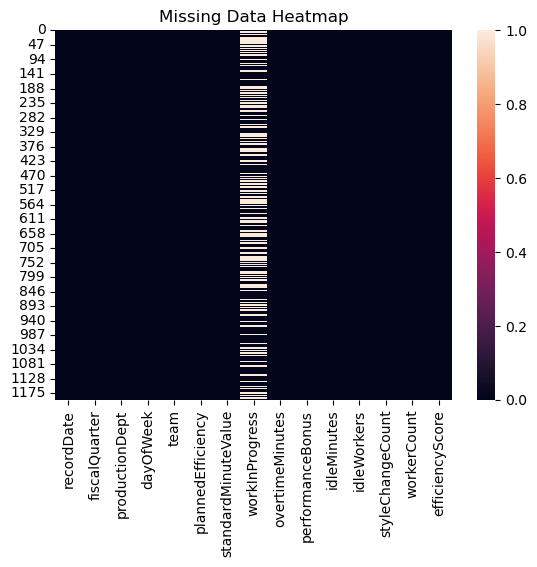

In [13]:
sns.heatmap(df.isnull())
plt.title('Missing Data Heatmap')
plt.show()

In [14]:
# to see if workInProgress is important for our model
df['workInProgress'].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: workInProgress, dtype: float64

##### The workInProgress column has a decent spread of values and isn’t all zeros or totally weird. So we can not drop the whole column.
##### We also observed that NaN values in column "workInProgress" are only against the "Finishing and Quality" values of column "productionDept".
##### So, to handle this we can split our dataset into two parts: 
##### - One data will contain a column "productionDept" but with only "Stitching Unit" values and "workInProgress" with the numeric values as before. 
##### - Second data will also contain a column called "productionDept" with only "Finishing and Quality" but will not contain any column called "workInProgress" as all those values are NaN (missing).

## EDA (Exploratory Data Analysis)

### Distribution of the Target (efficiencyScore)

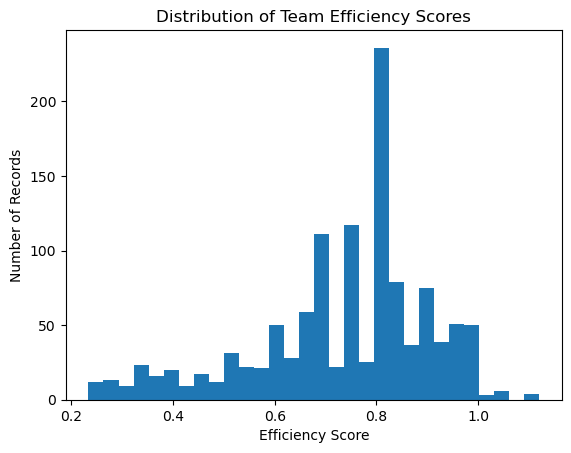

In [15]:
plt.hist(df['efficiencyScore'], bins=30)
plt.title('Distribution of Team Efficiency Scores')
plt.xlabel('Efficiency Score')
plt.ylabel('Number of Records')
plt.show()

#### Insights:
##### - Most teams are efficient: We can see a big spike around 0.8 on the x-axis, so a lot of records (teams on a day) have an efficiency score around 0.8.
##### - Some teams are less efficient: There are still a bunch of records from 0.3 to 0.7, so not everyone’s crushing it.
##### - A few outliers: There are a couple of records below 0.3 and above 1.0 (which might be super high/low performing or data weirdness).

### Boxplot Efficiency by Department

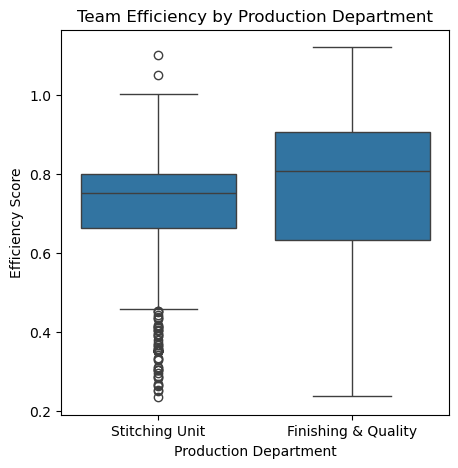

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(x='productionDept', y='efficiencyScore', data=df)
plt.title('Team Efficiency by Production Department')
plt.xlabel('Production Department')
plt.ylabel('Efficiency Score')
plt.show()

#### Insights:
##### - "Finishing & Quality" has a higher median efficiency (the middle line in this box is higher than "Stitching Unit").
##### - "Stitching Unit" has more low outliers (lots of dots below the box), meaning more days/teams with low efficiency.
##### - Spread: "Finishing & Quality" has a wide range, but most of its scores are high.
##### - Both departments can hit high efficiency (the top whiskers and outliers go above 1.0 for both).

### Plotting Overtime vs Efficiency

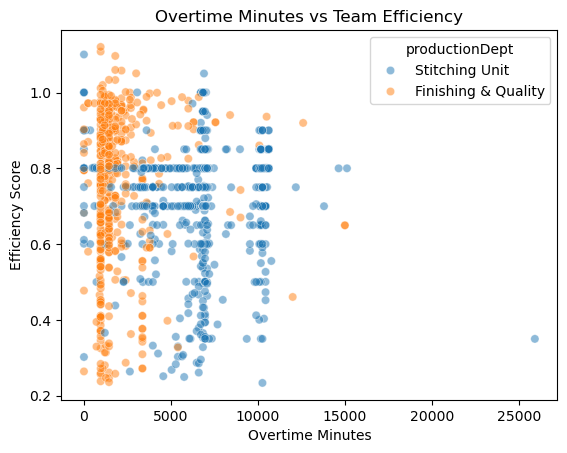

In [17]:
sns.scatterplot(
    data=df,
    x='overtimeMinutes',
    y='efficiencyScore',
    hue='productionDept',
    alpha=0.5
)

plt.title('Overtime Minutes vs Team Efficiency')
plt.xlabel('Overtime Minutes')
plt.ylabel('Efficiency Score')
plt.show()

#### Insights:
##### - No clear upward or downward trend: The dots are spread out all over, especially for lower overtime values. This suggests that just working more overtime doesn’t guarantee higher (or lower) efficiency.
##### - Most teams have overtime below 10,000 minutes: There are a few extreme outliers, a couple of teams way out to the right, but most are bunched up on the left.
##### - Wide range of efficiency at every overtime level: Even with similar overtime, some teams are super efficient and others aren’t.

### Plotting Performance Bonus vs Efficiency

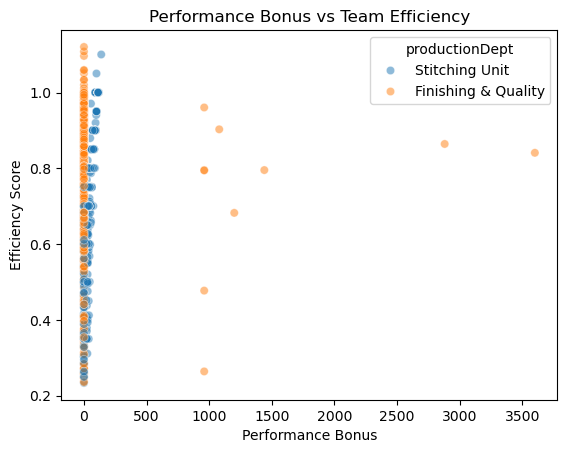

In [18]:
sns.scatterplot(
    data=df,
    x='performanceBonus',
    y='efficiencyScore',
    hue='productionDept',
    alpha=0.5
)

plt.title('Performance Bonus vs Team Efficiency')
plt.xlabel('Performance Bonus')
plt.ylabel('Efficiency Score')
plt.show()

#### Insights
##### - Most of the data is clustered at low bonus values: Almost all the points are stacked up around a bonus of 0–100. There are a few teams with really high bonuses (over 1000), but they’re rare.
##### - Wide range of efficiency at low bonus: Teams with little or no bonus can have low or high efficiency so getting no bonus doesn’t always mean you’re bad, and getting a small bonus doesn’t guarantee you’re good.
##### - No clear trend: There’s no obvious “upward” or “downward” line so, just giving a bigger bonus doesn’t magically make teams more efficient. The few teams with massive bonuses don’t always have higher efficiency either.

### Number of Workers vs Efficiency

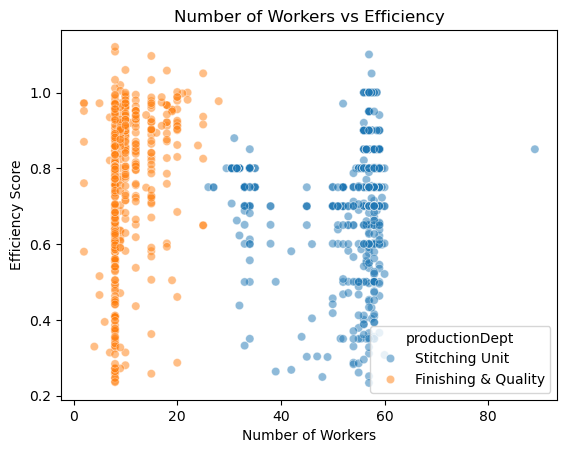

In [19]:
sns.scatterplot(
    data=df,
    x='workerCount',
    y='efficiencyScore',
    hue='productionDept', 
    alpha=0.5
)

plt.title('Number of Workers vs Efficiency')
plt.xlabel('Number of Workers')
plt.ylabel('Efficiency Score')
plt.show()

### Idle Workers vs Efficiency

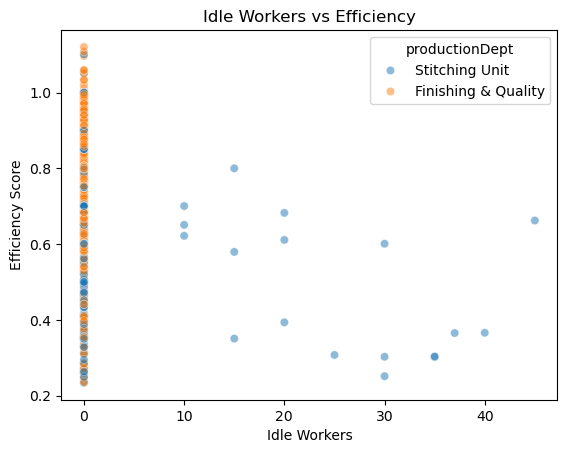

In [20]:
sns.scatterplot(
    data=df,
    x='idleWorkers',
    y='efficiencyScore',
    hue='productionDept',   
    alpha=0.5
)

plt.title('Idle Workers vs Efficiency')
plt.xlabel('Idle Workers')
plt.ylabel('Efficiency Score')
plt.show()

### Idle Minutes vs Efficiency

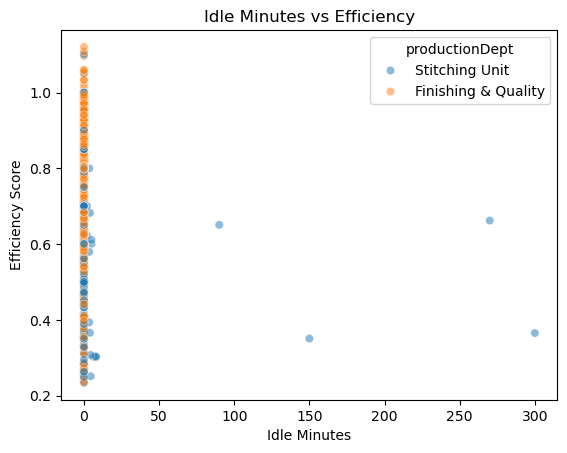

In [21]:
sns.scatterplot(
    data=df,
    x='idleMinutes',
    y='efficiencyScore',
    hue='productionDept',  
    alpha=0.5
)

plt.title('Idle Minutes vs Efficiency')
plt.xlabel('Idle Minutes')
plt.ylabel('Efficiency Score')
plt.show()

### Efficiency by Day of Week

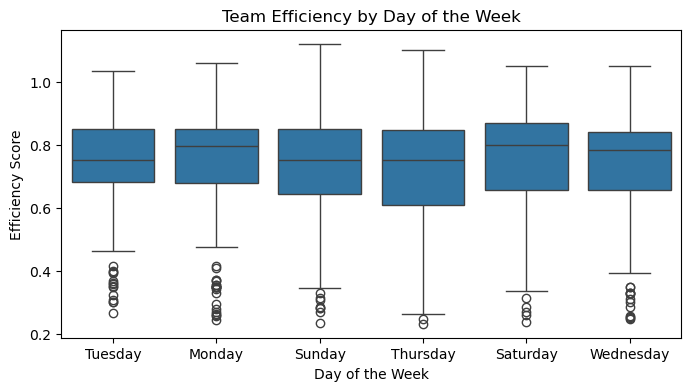

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x='dayOfWeek', y='efficiencyScore', data=df)
plt.title('Team Efficiency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Efficiency Score')
plt.show()

#### Insights:
##### - Median efficiency is pretty similar across all days. No day is way better or way worse than the others.
##### - Sundays and Thursdays have a slightly wider spread. There are some teams with super low efficiency on those days (watch those outliers!).
##### - Outliers exist on every day. Every day has some teams struggling, but it's not like Mondays are uniquely bad.

### Average Frequency Score by Fiscal Quarter

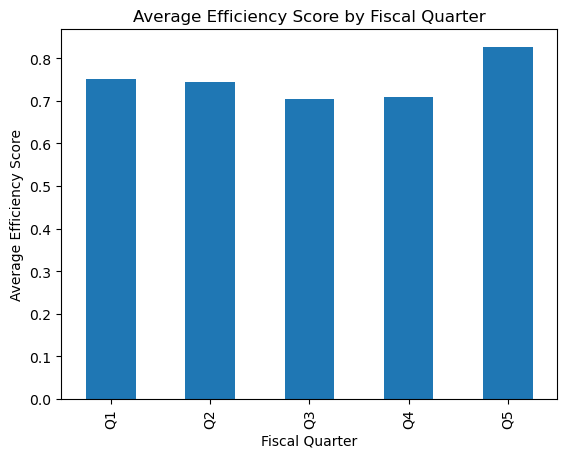

In [23]:
quarter_avg = df.groupby('fiscalQuarter')['efficiencyScore'].mean()
quarter_avg.plot(kind='bar')
plt.title('Average Efficiency Score by Fiscal Quarter')
plt.xlabel('Fiscal Quarter')
plt.ylabel('Average Efficiency Score')
plt.show()

#### Insights:
##### - There’s a noticeable dip in average efficiency during Q3 and Q4.
##### - Q5 stands out as the best-performing quarter, with efficiency noticeably higher than all others.
##### - Q1 and Q2 are stable and moderately high.

### Feature Correlation Analysis (Numerical Features)

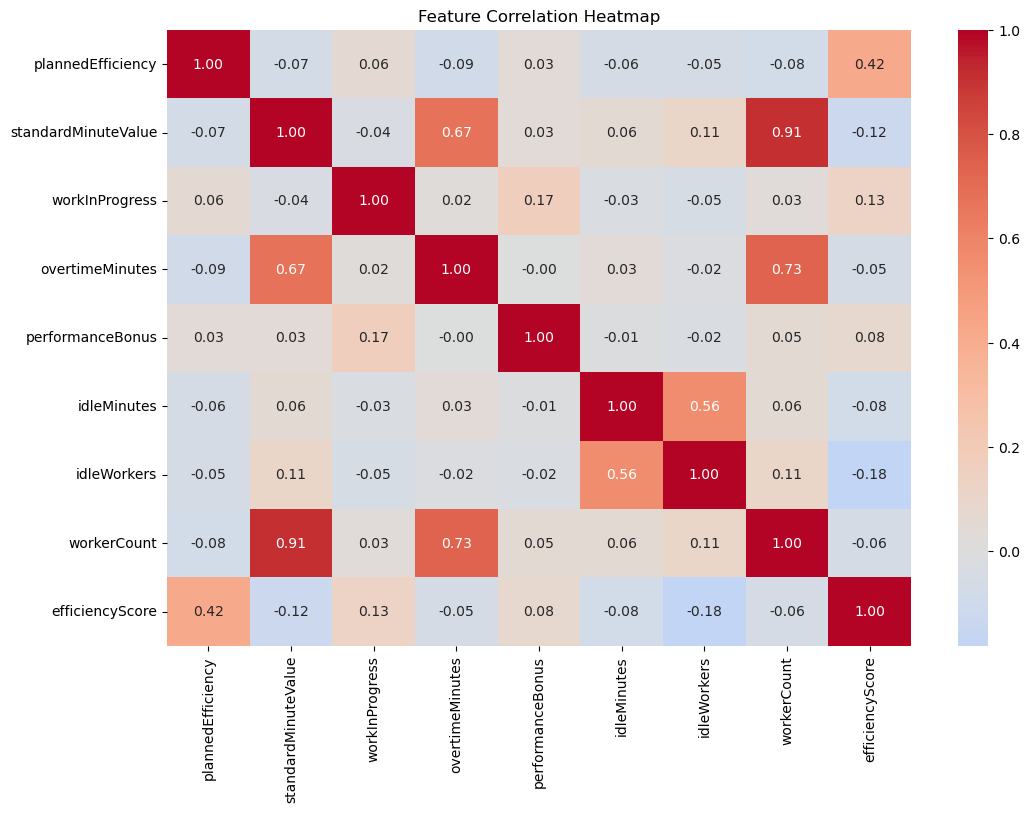

In [24]:
numeric_df = df.select_dtypes(include=['number']) 
corr = numeric_df.corr() 

#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    annot=True,           
    cmap='coolwarm',       
    fmt=".2f",             
    center=0              
)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Insights:
##### - plannedEfficiency: Most useful numeric feature for predicting efficiencyScore.
##### - workInProgress and performanceBonus: Minimal effect, but might help in combination or with non-linear models.
##### - idleWorkers: Worst for efficiency (but only a weak effect).